# Desafio - Regressão Linear

## Sobre o desafio

Você é o administrador de uma fazenda que depende da irrigação para garantir a produtividade das culturas. Recentemente, você começou a registrar os dados de irrigação em um arquivo CSV, que contém informações sobre as horas de irrigação e a área irrigada correspondente por ângulo.

Seu objetivo é analisar esses dados para entender a relação entre o tempo de irrigação e a área efetivamente irrigada, permitindo otimizar os recursos hídricos da fazenda. Para isso, você decidiu utilizar um modelo de regressão linear para prever a área irrigada com base nas horas de irrigação.

**Tarefa:**

1. **Carregar e Visualizar os Dados:**
    - Carregue os dados de irrigação a partir de um arquivo CSV.
    - Visualize os dados para entender a estrutura e as variáveis disponíveis.
2. **Análise Exploratória dos Dados (EDA):**
    - Calcule as estatísticas descritivas das variáveis.
    - Crie gráficos de dispersão para visualizar a relação entre as horas de irrigação e a área irrigada por ângulo.
    - Analise a correlação entre as variáveis.
3. **Construção do Modelo de Regressão Linear:**
    - Divida os dados em conjuntos de treino e teste.
    - Treine um modelo de regressão linear utilizando as horas de irrigação como variável independente (X) e a área irrigada por ângulo como variável dependente (Y).
    - Imprima a equação da reta obtida pelo modelo.
4. **Avaliação do Modelo:**
    - Utilize as métricas de desempenho (MSE, MAE) para avaliar a precisão do modelo.
    - Visualize os resultados reais e preditos em um gráfico.
5. **Análise de Resíduos:**
    - Calcule e analise os resíduos do modelo.
    - Verifique a normalidade dos resíduos utilizando testes estatísticos e gráficos.
6. **Predições de Exemplo:**
    - Utilize o modelo para fazer predições. Por exemplo, preveja a área irrigada por ângulo para 15 horas de irrigação.

## Dados:

[dados_de_irrigacao.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/08f749ff-d06d-49a8-a488-9846e081b224/1da32bce-9364-495d-90fa-bb4e1dec6515/dados_de_irrigacao.csv)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

## Carga de dados

In [7]:
df_irrigacao = pd.read_csv('./data/dados_de_irrigacao.csv')

In [8]:
df_irrigacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [9]:
df_irrigacao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: >

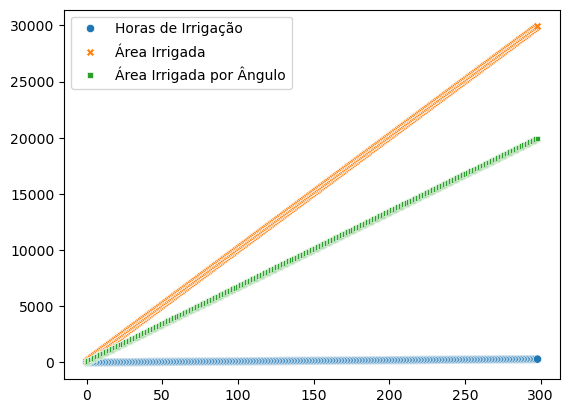

In [10]:
sns.scatterplot(df_irrigacao)

<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

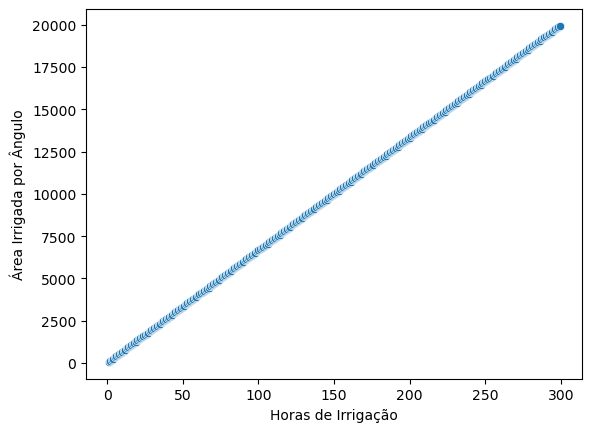

In [11]:
sns.scatterplot(df_irrigacao, x="Horas de Irrigação", y="Área Irrigada por Ângulo")

<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada'>

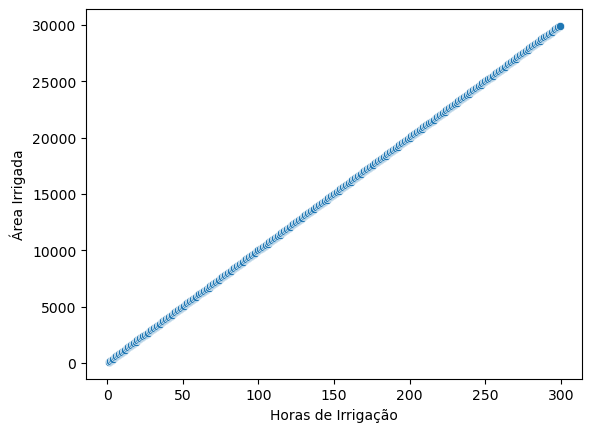

In [12]:
sns.scatterplot(df_irrigacao, x="Horas de Irrigação", y="Área Irrigada")

<Axes: >

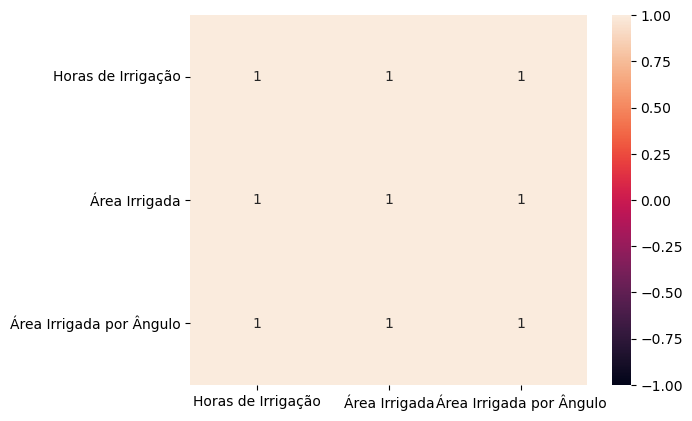

In [13]:
sns.heatmap(df_irrigacao.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

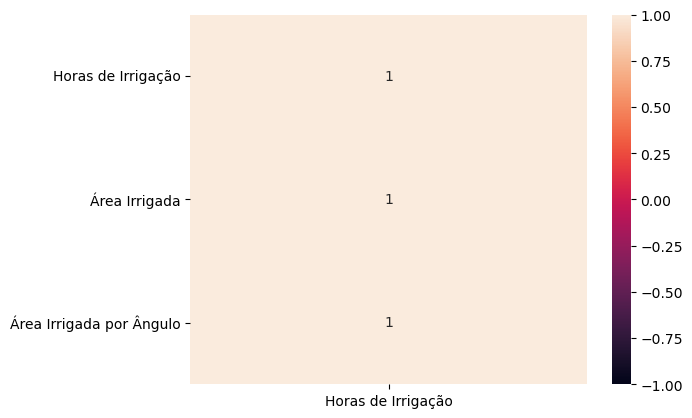

In [14]:
sns.heatmap(df_irrigacao.corr()[["Horas de Irrigação"]].sort_values(by="Horas de Irrigação", ascending=False), vmin=-1, vmax=1, annot=True)

In [ ]:
#Dividir
X = df_irrigacao.drop(columns=["Área Irrigada", "Área Irrigada por Ângulo"], axis=1)
y = df_irrigacao["Área Irrigada"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [16]:
preprocessor = Pipeline(steps=[
    ('num', StandardScaler())
])

model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])

model_reg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('num', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [17]:
y_pred = model_reg.predict(X_test)

In [18]:
x1_coef = model_reg.named_steps['regression'].coef_[0]
# x2_coef = model_reg.named_steps['regression'].coef_[1]
intercept = model_reg.named_steps['regression'].intercept_

print(f"A equação: Y = {intercept} + {x1_coef}*x1 ")

A equação: Y = 15108.78661087866 + 8550.003437352105*x1 


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)
r2_s = r2_score(y_test, y_pred)

In [20]:
print(f" O Erro absoluto médio é: {mae}\n O e erro médio raiz é: {mse}\n O R2 é {r2_s}")

 O Erro absoluto médio é: 2.6072181450823943e-12
 O e erro médio raiz é: 3.4988959781315035e-12
 O R2 é 1.0


In [21]:
residuos = (y_test - y_pred)
residuos_std = preprocessor.fit_transform(residuos.values.reshape(-1, 1)) 

<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada'>

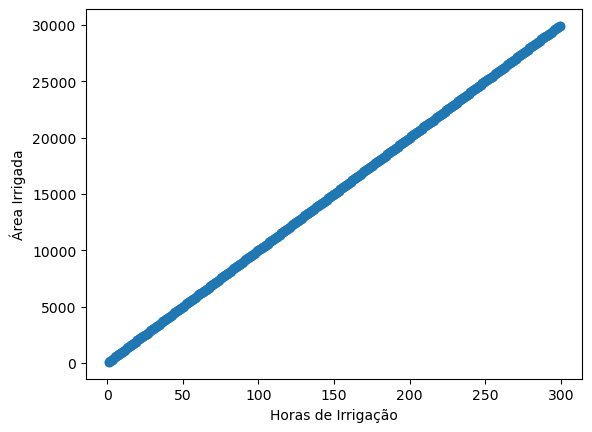

In [22]:
plt.scatter(x=df_irrigacao[['Horas de Irrigação']], y=df_irrigacao[['Área Irrigada']])
sns.regplot(x='Horas de Irrigação', y='Área Irrigada', data=df_irrigacao)

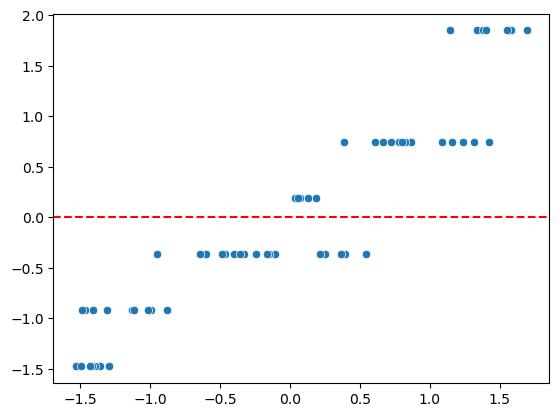

In [23]:
y_pred_std = preprocessor.fit_transform(y_pred.reshape(-1, 1))
sns.scatterplot(x=y_pred_std.reshape(-1), y=residuos_std.reshape(-1) )
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

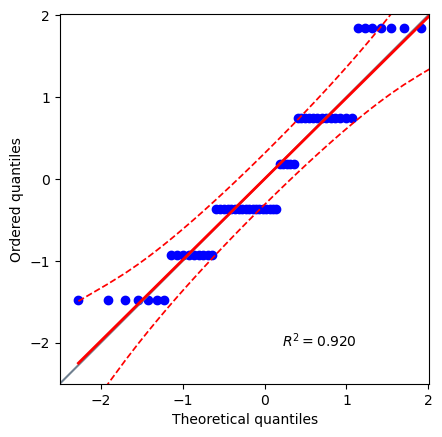

In [24]:
pg.qqplot(residuos_std, dist='norm', confidence=0.95)

<Axes: xlabel='Área Irrigada', ylabel='Count'>

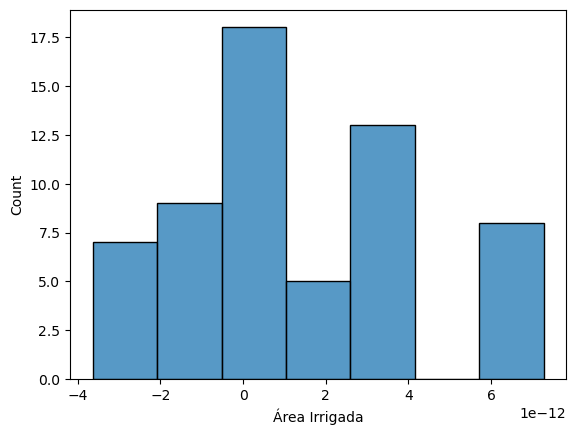

In [28]:
sns.histplot(residuos)

In [ ]:
# Teste de normalidade
statistic, p_value_shapiro = shapiro(residuos)

p_value_shapiro # Residuos muito pequenos

np.float64(0.0002661743443006922)

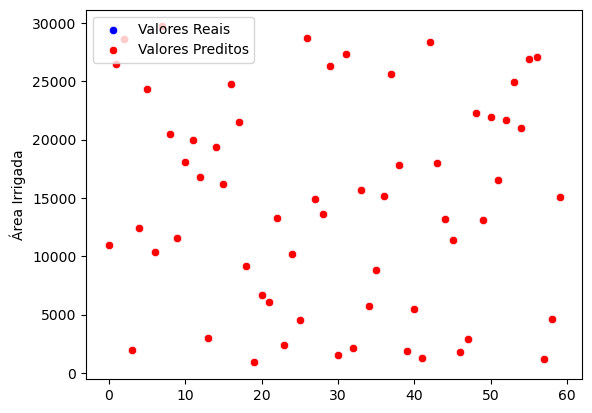

In [36]:
sns.scatterplot(x=range(len(y_test)), y=y_test, color='blue', label='Valores Reais')
sns.scatterplot(x=range(len(y_test)), y=y_pred, color='red', label='Valores Preditos')
plt.legend()
plt.show()

In [37]:
X = df_irrigacao.drop(columns=["Área Irrigada", "Área Irrigada por Ângulo"], axis=1)
y = df_irrigacao["Área Irrigada por Ângulo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
model_reg.fit(X_train, y_train)
model_reg.predict(X_test)

array([ 7333.33333333, 17666.66666667, 19066.66666667,  1333.33333333,
        8266.66666667, 16200.        ,  6933.33333333, 19800.        ,
       13666.66666667,  7733.33333333, 12066.66666667, 13333.33333333,
       11200.        ,  2000.        , 12933.33333333, 10800.        ,
       16533.33333333, 14333.33333333,  6133.33333333,   600.        ,
        4466.66666667,  4066.66666667,  8866.66666667,  1600.        ,
        6800.        ,  3000.        , 19133.33333333,  9933.33333333,
        9066.66666667, 17533.33333333,  1000.        , 18200.        ,
        1400.        , 10466.66666667,  3800.        ,  5866.66666667,
       10133.33333333, 17066.66666667, 11866.66666667,  1266.66666667,
        3666.66666667,   866.66666667, 18933.33333333, 12000.        ,
        8800.        ,  7600.        ,  1200.        ,  1933.33333333,
       14866.66666667,  8733.33333333, 14600.        , 11000.        ,
       14466.66666667, 16600.        , 14000.        , 17933.33333333,
      

In [40]:
model_reg.predict([[15]])

/home/aderson/miniconda3/envs/aprendendo/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1000.])